# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 2</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ZapataCristian*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** Se requiere construir una caja con tapa con un volumen de $72 cm^3$. Además, lo largo de la base debe ser el doble de lo ancho. ¿Cuáles deben ser las dimensiones de modo que el área superficial de la caja sea mínima? y, ¿cuál la superfie mínima?

Ver la siguiente figura como ayuda
![imagen.png](Caja.png)

**Punto 1 (10 puntos).** Encuentre el área superficial de la caja en función de la variable $x$, $S(x)$. 

Realice este punto usando fórmulas en LaTeX, en celdas Markdown.

**Solución punto 1.**

El área superficial está definida por

$$S = 2xy + 2xz + 2yz$$

Por planteamiento del problema se tiene que la base debe ser el doble de lo ancho, por lo que

$$x = 2y$$

Por lo tanto despejando $y$

$$y = x/2$$

Y el volumen total está dado por

$$xyz = x(\frac{x}{2})z = 72$$

Despejando z

$$z=\frac{144}{x^2}$$

Reemplazando

$$S(x) = x^2 + \frac{432}{x} $$


**Punto 2 (15 puntos).** Usando `sympy` minimice la función $S(x)$.

**Solución punto 2.**

In [1]:
import sympy as sym

In [2]:
sym.var('x')

x

In [3]:
def S(x):
    return x**2 + 432/x

In [4]:
dS = sym.diff(S(x),x)
dS

2*x - 432/x**2

In [5]:
xc=sym.solve(dS,x)
xc

[6, -3 - 3*sqrt(3)*I, -3 + 3*sqrt(3)*I]

In [6]:
d2S = sym.diff(S(x),x,2)
d2S.subs(x,xc[0])

6

El mínimo de la función es alcanzado en $x = 6$ y tiene un valor de $108$

**Punto 3 (5 puntos).** ¿Cuáles son las dimensiones $x$, $y$, $z$ de la caja?

**Solución punto 3.**

Para la dimensión de x se tiene que

In [7]:
x = xc[0]
x

6

Y para $y$ se tiene que

In [8]:
y = xc[0]/2
y

3

Y finalmente para $z$

In [9]:
z = 144/xc[0]**2
z

4

## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** Se va a organizar una planta de un taller de automóviles donde van a trabajar electricistas y
mecánicos; por necesidades de mercado, es necesario que el número de mecánicos sea igual o mayor
al número de electricistas y que el número de mecánicos no supere al doble qué el de electricistas. En
total hay disponibles $20$ electricistas y $30$ mecánicos. El beneficio de la empresa por jornada es $\$25000$ por electricista y $\$20000$ por mecánico. ¿Cuántos trabajadores de cada clase deben elegirse para
obtener el máximo beneficio?

*Definición de variables*: Sea $x_1$ número de mecánicos a elegir y $x_2$ número de electricistas a elegir.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`). Adicionalmente, si se requiere, recuerde escribir las cotas (límites superiores e inferiores) para cada una de las variables.

**Solución punto 1.**

La función a maximizar viene dada por

$$\max_{x_1,x_2} 20000x_1 + 25000x_2$$

y las restricciones son las siguientes:

$$ x_1 \geq x_2 $$
$$ x_1\leq 2x_2$$
$$x_1 \leq 30$$
$$x_2 \leq 20$$

In [10]:
import scipy.optimize as opt
import numpy as np

In [11]:
# Escriba acá las matrices como arreglos de Numpy
c = -np.array([20000,25000])
A = np.array([[-1,1],
              [1,-2],
              [1,0],
              [0,1]])
b = np.array([0,0,30,20])

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos será la ganancia total?

In [12]:
sol = opt.linprog(c,A_ub=A,b_ub=b)

In [13]:
sol

     con: array([], dtype=float64)
     fun: -1099999.9999553459
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([1.00000000e+01, 1.00000000e+01, 1.24316912e-09, 7.91626320e-10])
  status: 0
 success: True
       x: array([30., 20.])

La ganancia total en los intereses será de $44000$

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `rural_poblation.csv` contiene información histórica anual de México relativa al porcentaje de población rural desde el año 1960 hasta el año 2017. La primer columna corresponde al consecutivo, la segunda a los años y la tercera al porcentaje de población rural.

Tomado de: https://data.worldbank.org/indicator/SP.RUR.TOTL.ZS?locations=MX&view=chart

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [14]:
import pandas as pd

In [15]:
archivo = 'rural_poblation.csv'
data = pd.read_csv(archivo)
data

,Consecutivo,Indicator Name,Rural population (% of total population)
0,1,1960,49.247
1,2,1961,48.410
2,3,1962,47.572
3,4,1963,46.735
4,5,1964,45.900
5,6,1965,45.069
6,7,1966,44.239
7,8,1967,43.413
8,9,1968,42.589
9,10,1969,41.771


**Punto 2 (15 puntos).** Usando el consecutivo como variable independiente $x$ y el porcentaje de pobalción rural como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [16]:
import numpy as np
import scipy.optimize as opt

In [31]:
x = data.iloc[:,0]
y = data.iloc[:,2]



In [18]:
def fun_obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [19]:
b01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, b01, args=(x,y,1))
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x,y,2))
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x,y,3))
b04 = np.zeros(5)

In [20]:
ajuste1

      fun: 176.86210612484118
 hess_inv: array([[ 3.54243076e-02, -9.08324111e-04],
       [-9.08324111e-04,  3.07835769e-05]])
      jac: array([1.90734863e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([45.95148  , -0.4929514])

In [21]:
ajuste2

      fun: 6.2216183156586915
 hess_inv: array([[ 8.32909914e-02, -5.69433728e-03,  8.11153461e-05],
       [-5.69433728e-03,  5.09235324e-04, -8.10849020e-06],
       [ 8.11153461e-05, -8.10849020e-06,  1.37414353e-07]])
      jac: array([ 4.88758087e-06,  2.62260437e-06, -1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([ 4.99903977e+01, -8.96843153e-01,  6.84562290e-03])

In [22]:
ajuste3

      fun: 2.0350220243568153
 hess_inv: array([[ 1.57417502e-01, -2.01689631e-02,  6.89419663e-04,
        -6.87455489e-06],
       [-2.01689631e-02,  3.33409055e-03, -1.26801136e-04,
         1.34123174e-06],
       [ 6.89419663e-04, -1.26801136e-04,  5.12420643e-06,
        -5.63489641e-08],
       [-6.87455489e-06,  1.34123174e-06, -5.63489641e-08,
         6.36711679e-10]])
      jac: array([ 5.96046448e-08, -2.98023224e-08, -4.08291817e-06,  1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 5.08125087e+01, -1.05723747e+00,  1.35842407e-02, -7.61425785e-05])

In [23]:
xpoints = x
ypoints = y
yhat1 = (ajuste1.x[0]+ajuste1.x[1]*xpoints)
yhat2 = (ajuste2.x[0]+ajuste2.x[1]*xpoints+ajuste2.x[2]*(xpoints**2))
yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints+ajuste3.x[2]*(xpoints**2)+ajuste3.x[3]*(xpoints**3))

In [24]:
import matplotlib.pyplot as plt

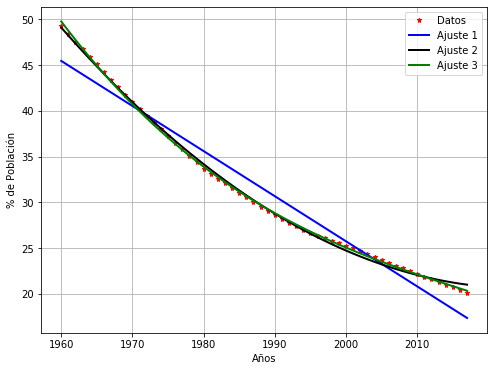

In [27]:
plt.figure(figsize=(8,6))
plt.plot(xpoints+1959, ypoints, 'r*', ms=5, label='Datos')
plt.plot(xpoints+1959, yhat1, 'b', lw=2, label='Ajuste 1')
plt.plot(xpoints+1959, yhat2, 'k', lw=2, label='Ajuste 2')
plt.plot(xpoints+1959, yhat3, 'g', lw=2, label='Ajuste 3')
plt.grid()
plt.xlabel('Años')
plt.ylabel('% de Población')
plt.legend(loc='best')

Text(0, 0.5, 'error')

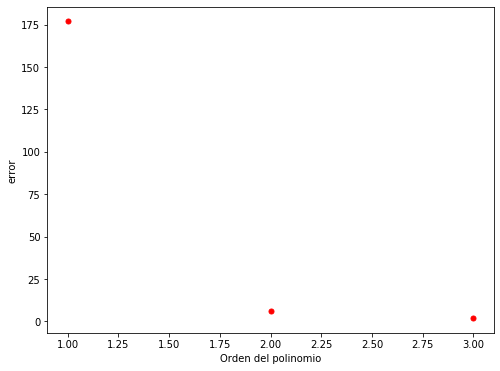

In [28]:
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4), error, 'ro', ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')

*Conclusión*

Según la gráfica anterior, el polinomio que mejor se ajusta es el de tercer orden.

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime la población en el año 2017 y compare con el dato real 20.133%.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [32]:
yhat1[57],yhat2[57],yhat3[57],data.iloc[57,2]

(17.360298970331417, 21.002170269020368, 20.3337906002335, 20.133)

*Conclusión*. El polinomio que mejor estima este dato es el polinomio de grado tres.